## Exercise 1: Vectorization

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
data = np.genfromtxt('advertising.csv', delimiter=',', skip_header=1)
N = data.shape[0]
X = data[:, :3]
y = data[:, 3:]

# Normalize input data using mean normalization
def mean_normalization(X):
    N = len(X)
    maxi = np.max(X)
    mini = np.min(X)
    avg = np.mean(X)
    X_normalized = (X - avg) / (maxi - mini)
    X_b = np.c_[np.ones((N, 1)), X_normalized]
    return X_b, maxi, mini, avg

# Apply mean normalization to X
X_b, maxi, mini, avg = mean_normalization(X)

In [11]:
def stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.00001):

    # thetas = np.random.randn(4, 1) # uncomment this line for real application
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])

    thetas_path = [thetas.copy()]
    losses = []

    for epoch in range(n_epochs):
        for i in range(N):
            # select random number in N
            # random_index = np.random.randint(N) # In real application, you should use this code
            random_index = i # This code is used for this assignment only

            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]

            # Compute output
            prediction = np.dot(xi, thetas)
            y_hat = np.sum(prediction)

            # Compute loss li
            li = (y_hat - yi) ** 2 # MSE

            # Compute gradient for loss
            gradient_li = 2 * (y_hat - yi) * xi

            # Compute gradient
            gradient = gradient_li.transpose()

            # Append thetas to the path
            thetas_path.append(thetas.copy())

            # Update theta
            thetas = thetas - learning_rate * gradient

            # Logging
            losses.append(np.sum(li))

    return thetas_path, losses

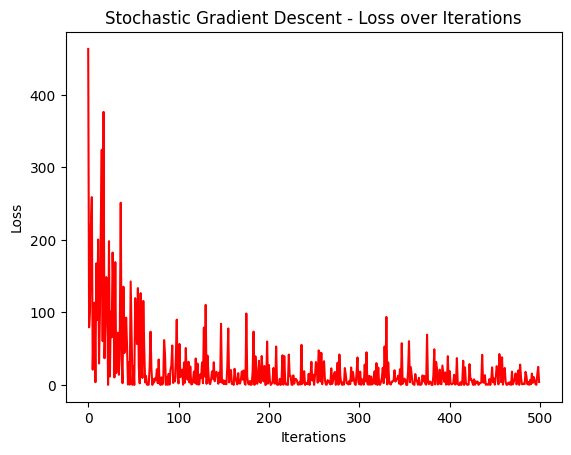

In [12]:
sgd_thetas, sgd_losses = stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.01)
x_axis = list(range(len(sgd_losses[:500])))
plt.plot(x_axis, sgd_losses[:500], color="red")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Stochastic Gradient Descent - Loss over Iterations")
plt.show()

In [13]:
sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=1, learning_rate=0.01)
print(np.sum(losses))

8392.629213090673


# Exercise 2: Mini_batch_gradient_descent

In [18]:
def mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01):

    # Initialize parameters
    # thetas = np.random.randn(4, 1)
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])

    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        # Shuffle indices for mini-batch selection
        # shuffled_indices = np.random.permutation(N)
        shuffled_indices = np.asarray([21, 144, 17, 107, 37, 115, 167, 31, 3, 132, 179, 155,
                                       36, 191, 182, 170, 27, 35, 162, 25, 28, 73, 172, 152,
                                       102, 16, 185, 11, 1, 34, 177, 29, 96, 22, 76, 196,
                                       6, 128, 114, 117, 111, 43, 57, 126, 165, 78, 151,
                                       104, 110, 53, 181, 113, 173, 75, 23, 161, 85, 94,
                                       18, 148, 190, 169, 149, 79, 138, 20, 108, 137, 93,
                                       192, 198, 153, 4, 45, 164, 26, 8, 131, 77, 80, 130,
                                       127, 125, 61, 10, 175, 143, 87, 33, 50, 54, 97, 9,
                                       84, 188, 139, 195, 72, 64, 194, 44, 109, 112, 60,
                                       86, 90, 140, 171, 59, 199, 105, 41, 147, 92, 52,
                                       124, 71, 197, 163, 98, 189, 103, 51, 39, 180, 74,
                                       145, 118, 38, 47, 174, 100, 184, 183, 160, 69, 91,
                                       82, 42, 89, 81, 186, 136, 63, 157, 46, 67, 129,
                                       120, 116, 32, 19, 187, 70, 141, 146, 15, 58, 119,
                                       12, 95, 0, 40, 83, 24, 168, 150, 178, 49, 159, 7,
                                       193, 48, 30, 14, 121, 5, 142, 65, 176, 101, 55,
                                       133, 13, 106, 66, 99, 68, 135, 158, 88, 62, 166,
                                       156, 2, 134, 56, 123, 122, 154])

        # Shuffle X and y
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        # Process each mini-batch
        for i in range(0, N, minibatch_size):
            xi = X_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]

            # Compute output (prediction)
            prediction = np.dot(xi, thetas)

            # Compute loss (mean squared error)
            loss = np.mean((prediction - yi) ** 2)

            # Compute gradient for loss
            gradient_loss = 2 / minibatch_size * xi.T.dot(prediction - yi)

            # Update parameters
            thetas = thetas - learning_rate * gradient_loss
            thetas_path.append(thetas.copy())

            # Store the mean loss
            losses.append(loss)

    return thetas_path, losses

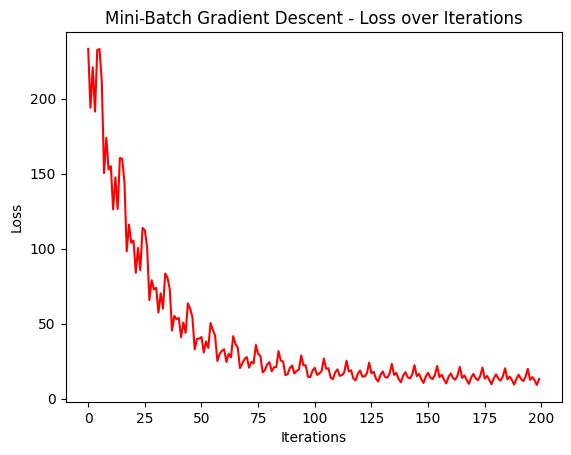

11402.48


In [19]:
# Run mini-batch gradient descent and plot results
mbgd_thetas, mbgd_losses = mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01)
x_axis = list(range(200))
plt.plot(x_axis, mbgd_losses[:200], color="red")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Mini-Batch Gradient Descent - Loss over Iterations")
plt.show()

# Print the sum of all losses rounded to two decimal places
print(round(sum(mbgd_losses), 2))

# Exercise 3: Batch_gradient_descent

In [16]:
def batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01):

    # Initialize parameters (thetas)
    # thetas = np.random.randn(4, 1) # uncomment this line for real application
    thetas = np.asarray([[1.16270837], [-0.81960489], [1.39501033], [0.29763545]])

    thetas_path = [thetas]
    losses = []

    for i in range(n_epochs):
        # Compute output (predictions)
        prediction = np.dot(X_b, thetas)

        # Compute loss
        loss = np.mean((prediction - y) ** 2) # MSE

        # Compute gradient
        gradient = 2 / N * X_b.T.dot(prediction - y)

        # Update parameters
        thetas = thetas - learning_rate * gradient
        thetas_path.append(thetas.copy())

        # Logging
        losses.append(loss)

    return thetas_path, losses


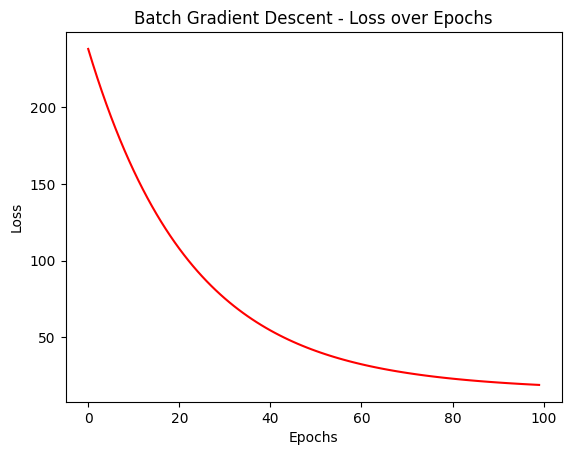

6716.46


In [17]:
bgd_thetas, bgd_losses = batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01)
x_axis = list(range(100))
plt.plot(x_axis, bgd_losses[:100], color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Batch Gradient Descent - Loss over Epochs")
plt.show()

print(round(sum(bgd_losses), 2))